# Demo cas test avec maquette

Ceci est un notebook pour des expériences numériques en différents cas faites avec la maquette. On présente également une méthode d'affichage des caractéristiques de l'objet colonne pour visualiser les résultats des cas tests. 

__User friendly :__ Il vous suffit de changer les paramètres des dictionnaires dans les cellules de calcul

__Expert CALCUL :__ Vous pouvez directement travailler sur les objets générés

In [1]:
# importation des modules de CALCUL
from pyheatmy import *
# importation de modules utiles pour travailler directement sur les objets.
import matplotlib.pyplot as plt
import numpy as np

__Résumé des différents cas test__

Cas infiltration, conduction : dH > 0, K petit

Cas infiltration, advection : dH > 0, K grand

Cas exfiltration, conduction : dH < 0, K petit

Cas exfiltration, advection : dH < 0, K grand

Le paramétrage des cas tests est répertorié de façon exhaustive sur le tableur en ligne partagé avec le lien ci-dessous :
https://docs.google.com/spreadsheets/d/1ilzmAvUA9IV6EsWI-AGt9UUJYVuh98ky1rydrC7Ep4A/edit?usp=sharing

## Variables globales de l'expérience

Un utilisateur de cette démo peut modifier librement les paramètres temporels de l'expérience. Une modification rapide du code permet aussi de passer des variables globales dans les arguments de la fonction de définition.

In [2]:
K_offset = 273.15

t_debut = (2010, 1, 1)
t_fin = (2010, 5, 30, 23, 59, 59)
dt = 15*60 # pas de temps en (s)

T_riv_amp = 1
T_riv_offset = 20 + K_offset
P_T_riv = 5*24*4*dt

T_aq_amp = 0
T_aq_offset = 12 + K_offset
P_T_aq = -9999 # à mettre dans le init

dH_amp = 0
dH_offset = 1
P_dh = -9999 #14*24*4*dt

nb_cells =100

## Fonction de définition de l'expérience

In [3]:
def gen_experiment_monolayer(depth_sensors, dH_offset, name, moinslog10K, n, lambda_s, rho_cs, nb_cells=nb_cells, perturb="False"):
    """Génération de l'expérience pour une seule couche"""
    # définition de l'expérience 
    """Times series"""
    time_series_dict = {
        "offset" : 0,
        "depth_sensors":depth_sensors,
        "param_time_dates": [t_debut, t_fin, dt], 
        "param_dH_signal": [dH_amp, P_dh, dH_offset],
        "param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
        "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
        "sigma_meas_P": 0.05,
        "sigma_meas_T": 0.1, #float
    }
    # on génère l'objet Times_series
    time_series = Time_series.from_dict(time_series_dict)
    # on génère les données
    if perturb == True :
        time_series._generate_perturb_T_riv_dH_series()
        time_series._generate_perturb_T_Shaft_Temp_series()
    else :
        time_series._generate_T_riv_dH_series()
        time_series._generate_Shaft_Temp_series()

    """Colonne"""
    col_dict = {
        "river_bed": 1., 
        "depth_sensors": depth_sensors,
        "offset": .0,
        "dH_measures": time_series._T_riv_dH_measures,
        "T_measures": time_series._T_Shaft_measures,
        "sigma_meas_P": time_series._sigma_P, #float
        "sigma_meas_T": time_series._sigma_T, #float
    }
    # on génère l'objet Column à partir de l'objet Time_series
    colonne_exp = Column.from_dict(col_dict)

    """Layer"""
    monolayer_dict = {
        "name": name,
        "zLow": depth_sensors[-1],
        "moinslog10K": moinslog10K,
        "n": n,
        "lambda_s": lambda_s,
        "rhos_cs": rho_cs
    }
    # on génère l'objet Layer
    monolayer = Layer.from_dict(monolayer_dict)

    """Valeurs analytiques"""
    analy_sol_dict = {
        "column_exp" : colonne_exp,
        "time_series" : time_series,
        "monolayer" : monolayer,
        "nb_cells" : nb_cells,
    }

    # on génère l'objet des solution analytique
    analy_sol_exp = Analy_Sol.from_dict(analy_sol_dict)
    return time_series, colonne_exp, monolayer, analy_sol_exp

In [4]:
# si la version multilayer est définie, la version monolayer sert simplement à obtenir la valeur RMSE avec la solution analytique
def gen_experiment_multilayer(depth_sensors, dH_offset, name_list, zLow_list, moinslog10K_list, n_list, lambda_s_list, rho_cs_list, nb_cells, perturb="False"):
    """Génération de l'expérience pour plusieurs couches et on ne génère pas de réponse analytique"""
    # définition de l'expérience 
    """Times series"""
    time_series_dict = {
        "offset" : 0,
        "depth_sensors":depth_sensors,
        "param_time_dates": [t_debut, t_fin, dt], 
        "param_dH_signal": [dH_amp, P_dh, dH_offset],
        "param_T_riv_signal": [T_riv_amp, P_T_riv, T_riv_offset],
        "param_T_aq_signal": [T_aq_amp, P_T_aq, T_aq_offset],
        "sigma_meas_P": 0.05,
        "sigma_meas_T": 0.1, #float
    }
    # on génère l'objet Times_series
    time_series = Time_series.from_dict(time_series_dict)
    # on génère les données
    if perturb == True :
        time_series._generate_perturb_T_riv_dH_series()
        time_series._generate_perturb_T_Shaft_Temp_series()
    else :
        time_series._generate_T_riv_dH_series()
        time_series._generate_Shaft_Temp_series()

    """Colonne"""
    col_dict = {
        "river_bed": 1., 
        "depth_sensors": depth_sensors,
        "offset": .0,
        "dH_measures": time_series._T_riv_dH_measures,
        "T_measures": time_series._T_Shaft_measures,
        "sigma_meas_P": time_series._sigma_P, #float
        "sigma_meas_T": time_series._sigma_T, #float
    }
    # on génère l'objet Column à partir de l'objet Time_series
    colonne_exp = Column.from_dict(col_dict)

    """Layer"""
    layers_list= layersListCreator([(name_list[i], zLow_list[i], moinslog10K_list[i], n_list[i], lambda_s_list[i], rho_cs_list[i]) for i in range(len(name_list))])

    return time_series, colonne_exp, layers_list


# 1. Cas test monolayer
L'utilisateur peut choisir les paramètres principaux de l'expérience grâce au dictionnaire. Il peut également modifier des var1ables globales si besoin.

## 1.1 Monolayer Infiltrant conductif

--- Compute Solve Transi ---
One layer : moinslog10K = 12, n = 0.1, lambda_s = 2, rhos_cs = 4000000.0
Done.


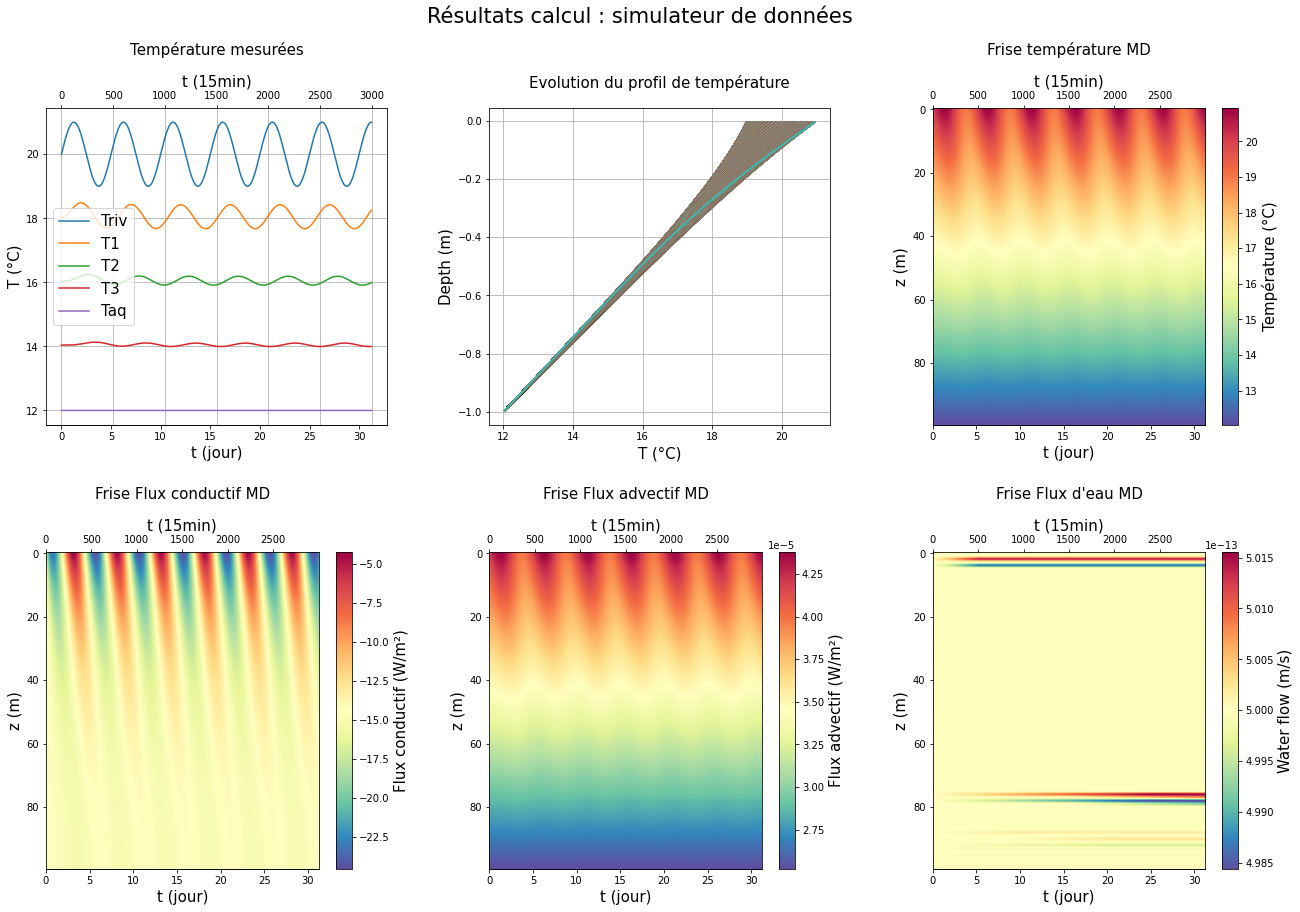

In [5]:
# paramètres principaux de l'expérience
dict_exp_monolayer ={
    "depth_sensors": [.25, .5, .75, 1],
    "dH_offset": 0.5,
    "name" : "sable",
    "moinslog10K": 12,
    "n": 0.1,
    "lambda_s": 2,
    "rho_cs": 4e6,
    "nb_cells": nb_cells,
}

# variable libre qui désigne le nombre de pas de temps visualisé sur le plot.
nt = 3000

# ne pas changer ces commandes
experiment_monolayer = [*gen_experiment_monolayer(**dict_exp_monolayer)] # [time_series, colonne_exp, monolayer, analy_sol_exp]
time_ser = experiment_monolayer[0]
col = experiment_monolayer[1]
layerlist = [experiment_monolayer[2]]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = nt)

## 1.2 Monolayer Exfiltrant conductif

--- Compute Solve Transi ---
One layer : moinslog10K = 12, n = 0.1, lambda_s = 2, rhos_cs = 4000000.0
Done.


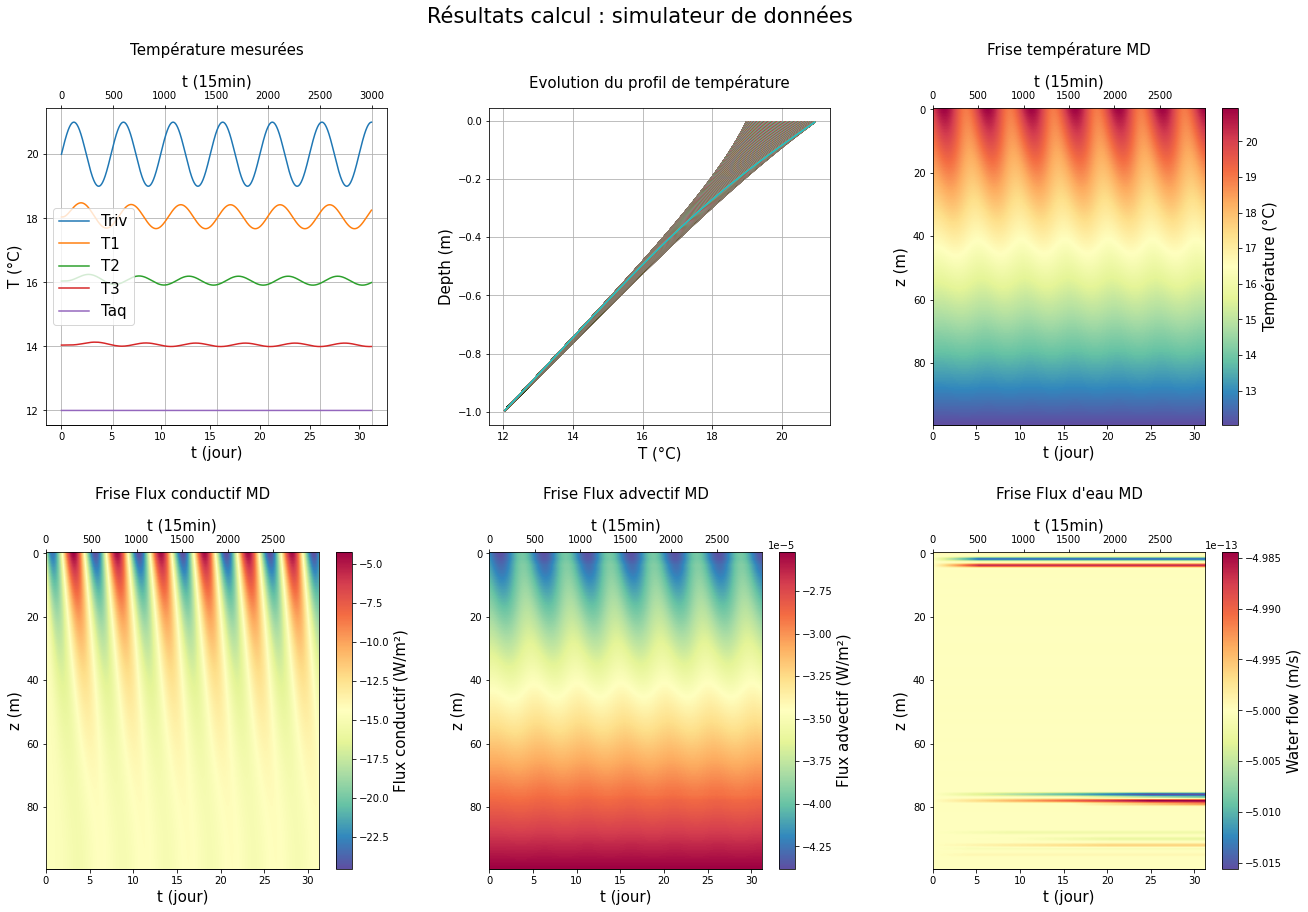

In [6]:
# paramètres principaux de l'expérience
dict_exp_monolayer ={
    "depth_sensors": [.25, .5, .75, 1],
    "dH_offset": -0.5,
    "name" : "sable",
    "moinslog10K": 12,
    "n": 0.1,
    "lambda_s": 2,
    "rho_cs": 4e6,
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_monolayer = [*gen_experiment_monolayer(**dict_exp_monolayer)] # [time_series, colonne_exp, monolayer, analy_sol_exp]
time_ser = experiment_monolayer[0]
col = experiment_monolayer[1]
layerlist = [experiment_monolayer[2]]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)

## 1.3 Monolayer Infiltrant advectif

--- Compute Solve Transi ---
One layer : moinslog10K = 5, n = 0.1, lambda_s = 2, rhos_cs = 4000000.0
Done.


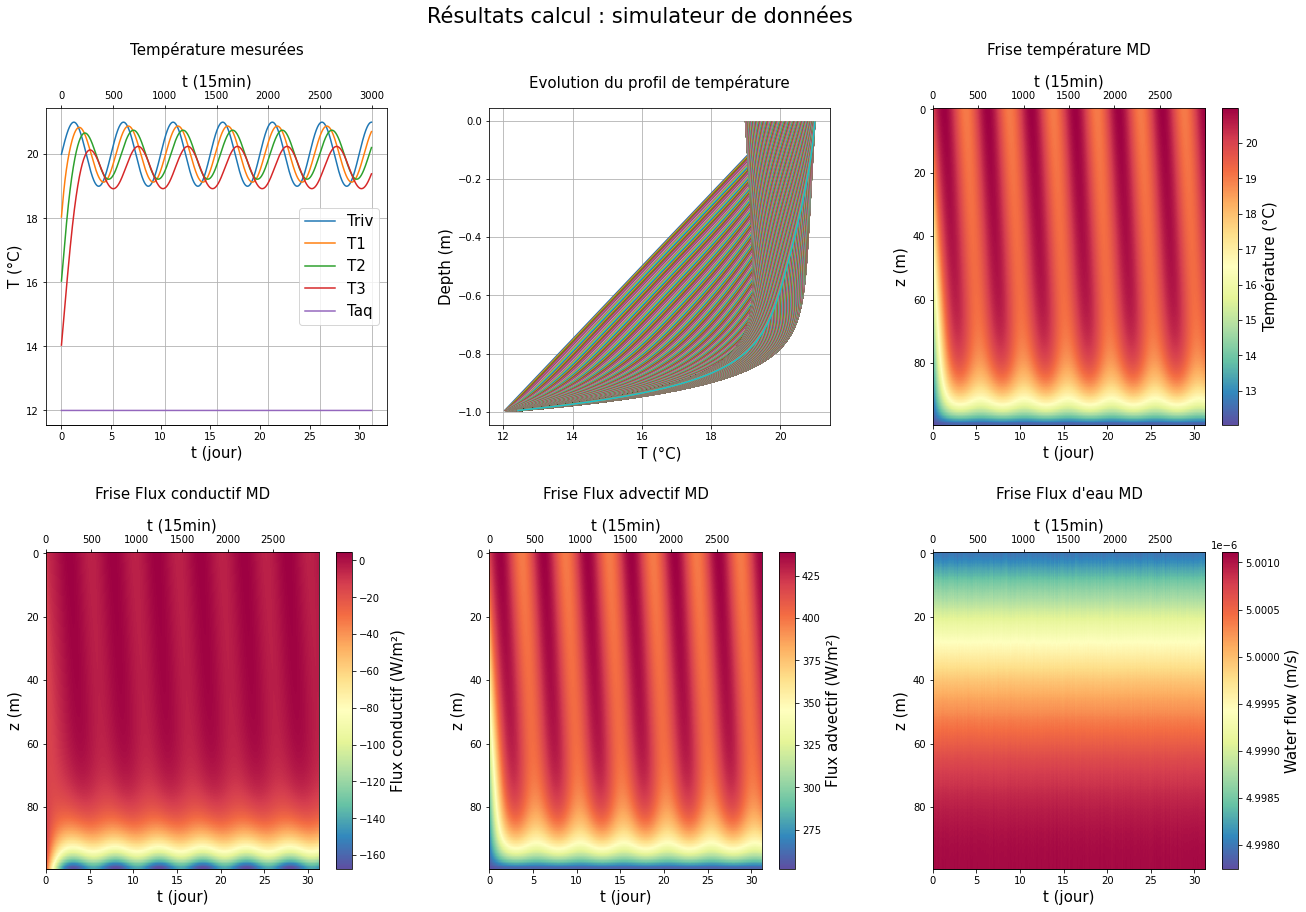

In [7]:
# paramètres principaux de l'expérience
dict_exp_monolayer ={
    "depth_sensors": [.25, .5, .75, 1],
    "dH_offset": 0.5,
    "name" : "sable",
    "moinslog10K": 5,
    "n": 0.1,
    "lambda_s": 2,
    "rho_cs": 4e6,
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_monolayer = [*gen_experiment_monolayer(**dict_exp_monolayer)] # [time_series, colonne_exp, monolayer, analy_sol_exp]
time_ser = experiment_monolayer[0]
col = experiment_monolayer[1]
layerlist = [experiment_monolayer[2]]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)

## 1.4 Monolayer Exfiltrant advectif

--- Compute Solve Transi ---
One layer : moinslog10K = 12, n = 0.1, lambda_s = 2, rhos_cs = 4000000.0
Done.


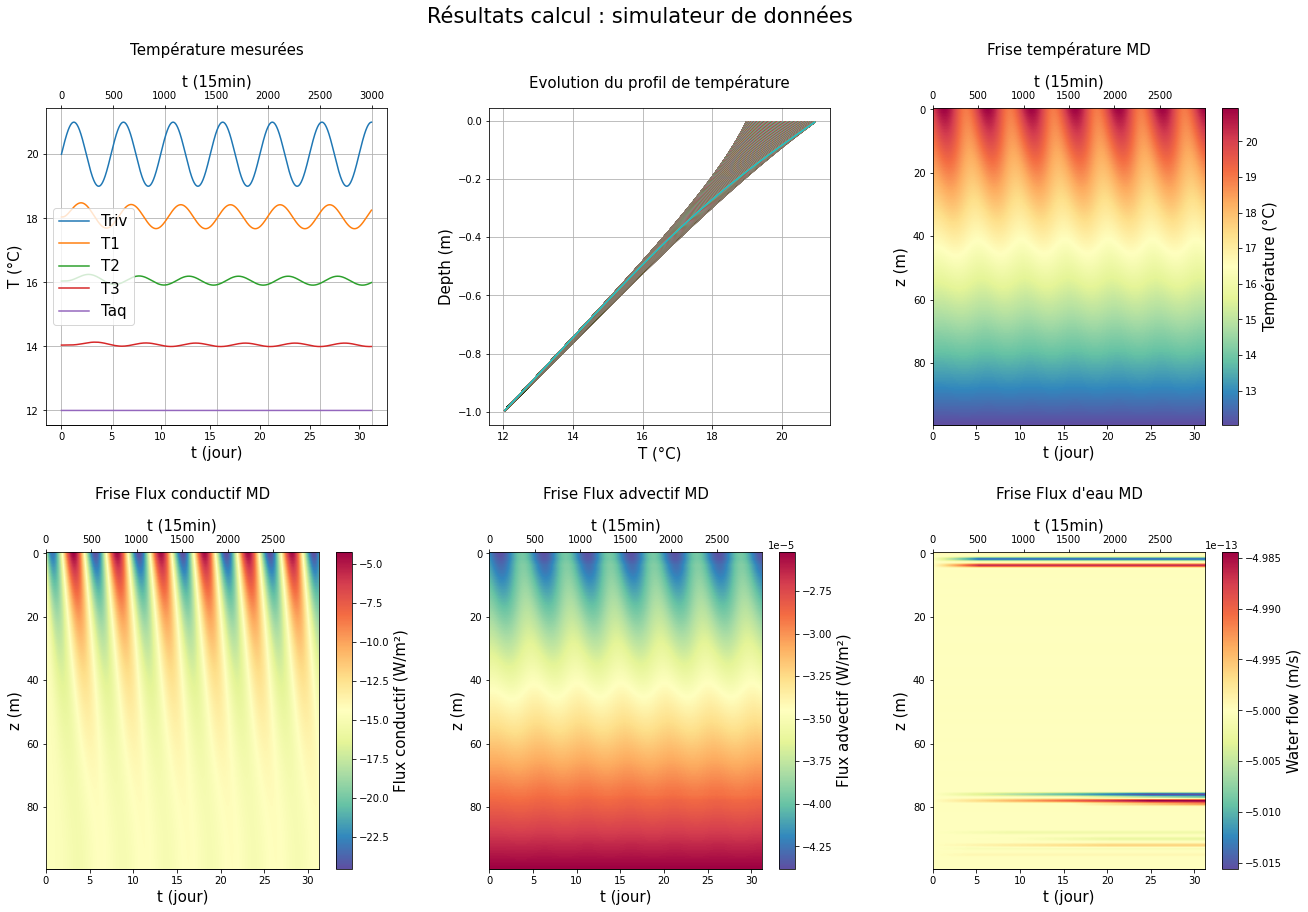

In [8]:
# paramètres principaux de l'expérience
dict_exp_monolayer ={
    "depth_sensors": [.25, .5, .75, 1],
    "dH_offset": -0.5,
    "name" : "sable",
    "moinslog10K": 12,
    "n": 0.1,
    "lambda_s": 2,
    "rho_cs": 4e6,
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_monolayer = [*gen_experiment_monolayer(**dict_exp_monolayer)] # [time_series, colonne_exp, monolayer, analy_sol_exp]
time_ser = experiment_monolayer[0]
col = experiment_monolayer[1]
layerlist = [experiment_monolayer[2]]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)

# 2. Maquette multilayer

La seule différence se trouve dans l'instanciation des paramètres des différentes couches.


## 2.1 Maquette 2 layers infiltrant

--- Compute Solve Transi ---
sable : ends at 0.25 m. Parametres(moinslog10K=5, n=0.26, lambda_s=1, rhos_cs=800000.0)
argile : ends at 0.5 m. Parametres(moinslog10K=4, n=0.3, lambda_s=5, rhos_cs=3000000.0)
Done.


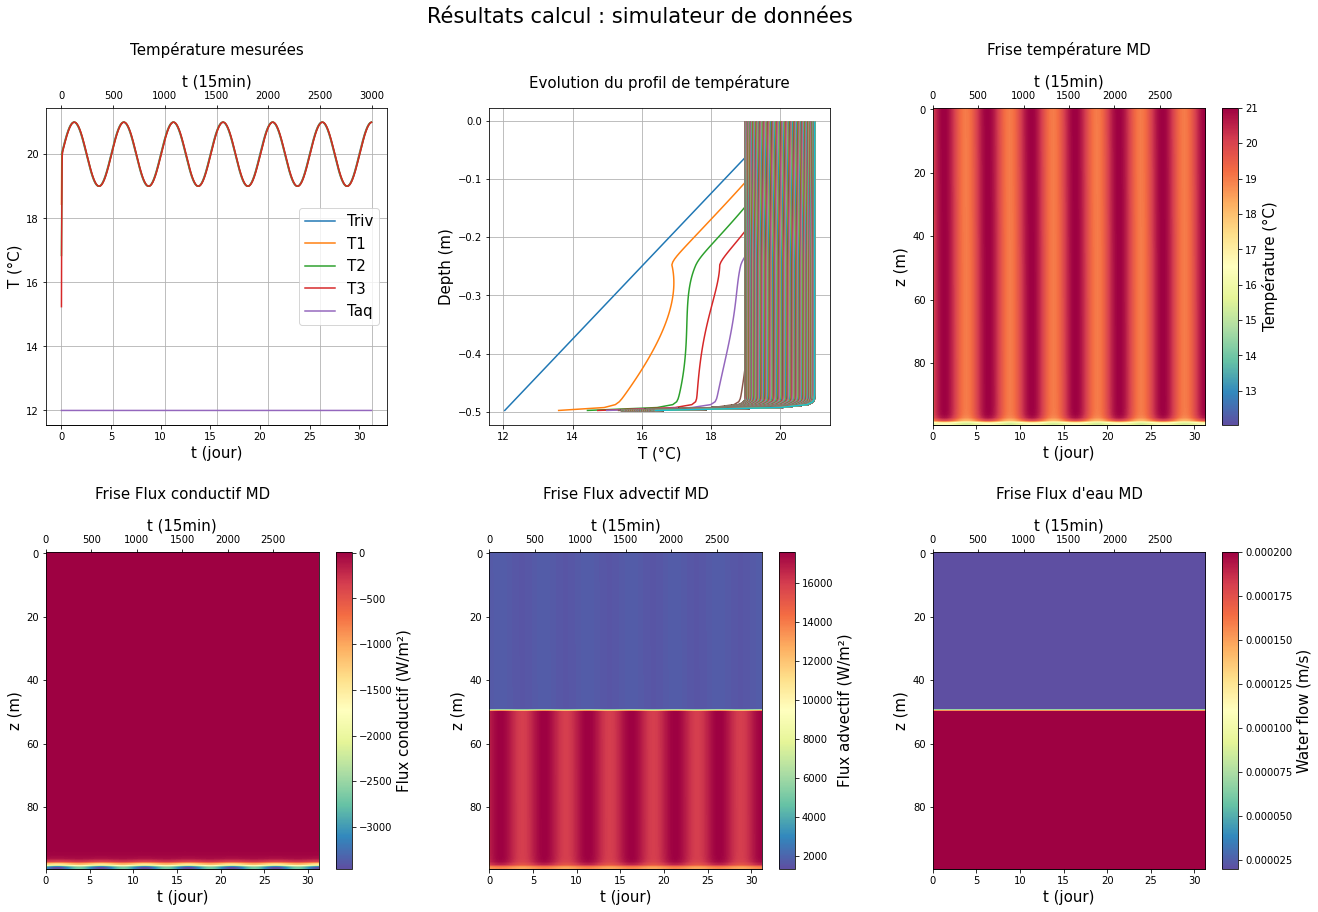

In [9]:
# paramètres principaux de l'expérience
dict_exp_multilayer ={
    "depth_sensors": [0.1, 0.2, 0.3, 0.5],
    "dH_offset": 1,
    "name_list": ["sable","argile"],
    "zLow_list": [.25,0.5],
    "moinslog10K_list": [5,4],
    "n_list": [.26,.3],
    "lambda_s_list": [1,5],
    "rho_cs_list": [8e5,3e6],
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_multilayer = [*gen_experiment_multilayer(**dict_exp_multilayer)] # [time_series, colonne_exp, layerlist]
time_ser = experiment_multilayer[0]
col = experiment_multilayer[1]
layerlist = experiment_multilayer[2]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)

## 2.2 Maquette 2 layers exfiltrant

--- Compute Solve Transi ---
sable : ends at 0.25 m. Parametres(moinslog10K=5, n=0.26, lambda_s=1, rhos_cs=800000.0)
argile : ends at 0.5 m. Parametres(moinslog10K=4, n=0.3, lambda_s=5, rhos_cs=3000000.0)
Done.


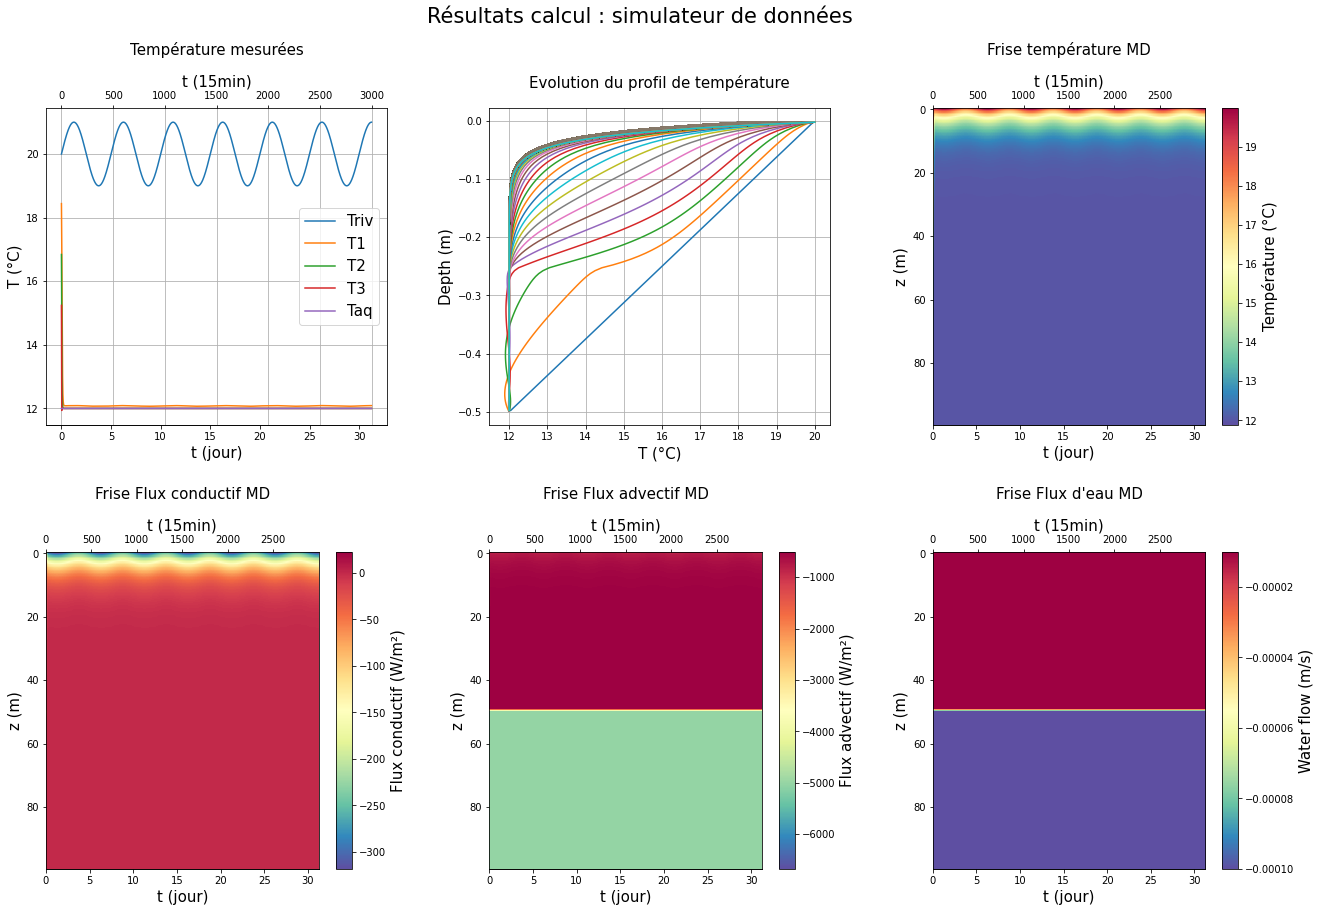

In [10]:
# paramètres principaux de l'expérience
dict_exp_multilayer ={
    "depth_sensors": [0.1, 0.2, 0.3, 0.5],
    "dH_offset": -0.5,
    "name_list": ["sable","argile"],
    "zLow_list": [.25,0.5],
    "moinslog10K_list": [5,4],
    "n_list": [.26,.3],
    "lambda_s_list": [1,5],
    "rho_cs_list": [8e5,3e6],
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_multilayer = [*gen_experiment_multilayer(**dict_exp_multilayer)] # [time_series, colonne_exp, layerlist]
time_ser = experiment_multilayer[0]
col = experiment_multilayer[1]
layerlist = experiment_multilayer[2]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)

# 3. Cas tests multilayers

Nous choississons un set arbitraire de 3 couches

## 3.1 une couche/capteur

### 3.1.1 Infiltrant

--- Compute Solve Transi ---
gravier : ends at 0.15 m. Parametres(moinslog10K=12, n=0.5, lambda_s=2, rhos_cs=4000000.0)
sable : ends at 0.25 m. Parametres(moinslog10K=12, n=0.3, lambda_s=2, rhos_cs=4000000.0)
argile : ends at 0.4 m. Parametres(moinslog10K=12, n=0.1, lambda_s=2, rhos_cs=4000000.0)
Done.


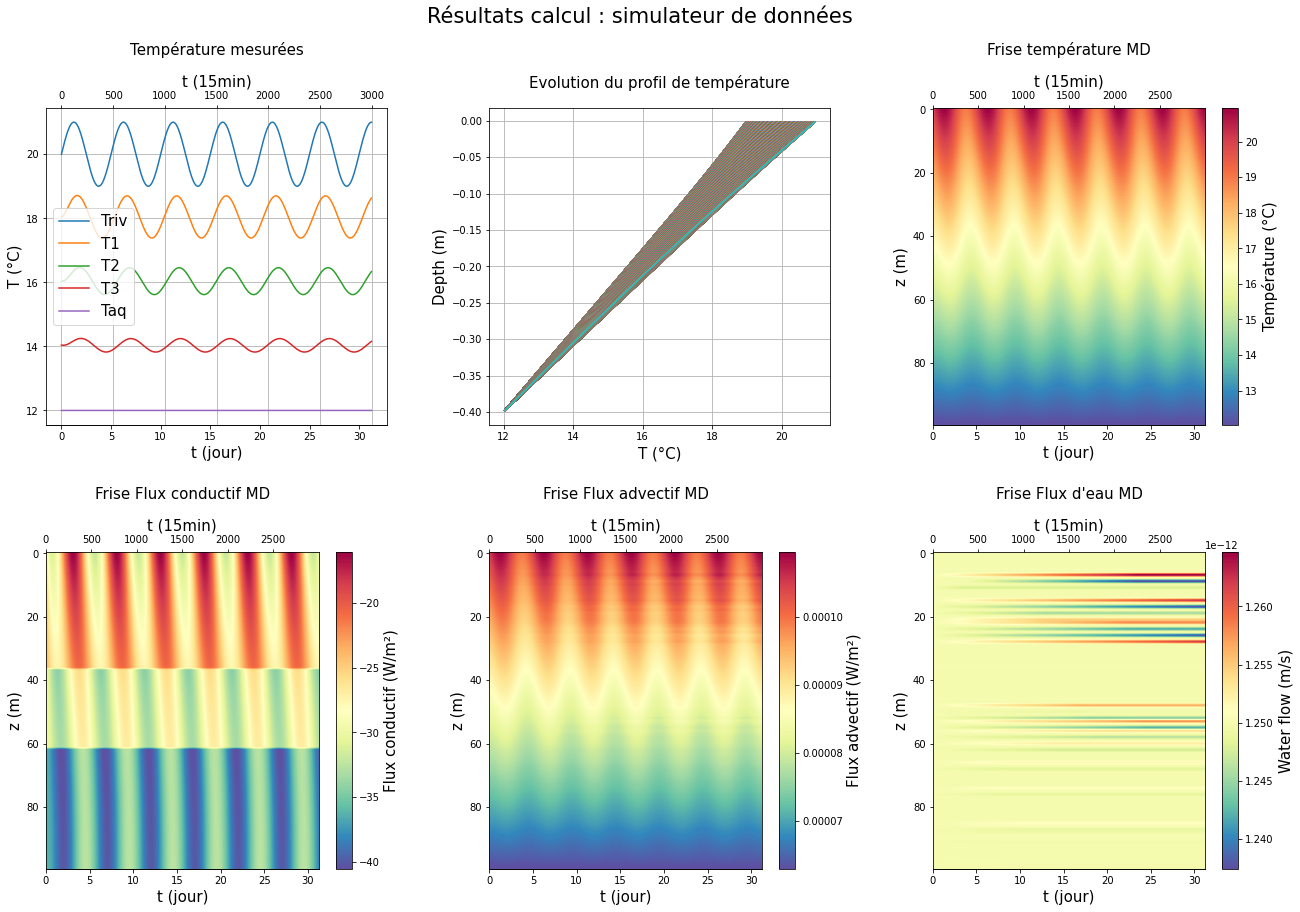

In [11]:
# paramètres principaux de l'expérience
dict_exp_multilayer ={
    "depth_sensors": [.1, .2, .3, .4],
    "dH_offset": 0.5,
    "name_list": ["gravier","sable","argile"],
    "zLow_list": [.15,.25,.4],
    "moinslog10K_list": [12,12,12],
    "n_list": [.5,.3,.1],
    "lambda_s_list": [2,2,2],
    "rho_cs_list": [4e6,4e6,4e6],
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_multilayer = [*gen_experiment_multilayer(**dict_exp_multilayer)] # [time_series, colonne_exp, layerlist]
time_ser = experiment_multilayer[0]
col = experiment_multilayer[1]
layerlist = experiment_multilayer[2]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)

### 3.1.2 Exfiltrant

--- Compute Solve Transi ---
gravier : ends at 0.15 m. Parametres(moinslog10K=12, n=0.5, lambda_s=2, rhos_cs=4000000.0)
sable : ends at 0.25 m. Parametres(moinslog10K=12, n=0.3, lambda_s=2, rhos_cs=4000000.0)
argile : ends at 0.4 m. Parametres(moinslog10K=12, n=0.1, lambda_s=2, rhos_cs=4000000.0)
Done.


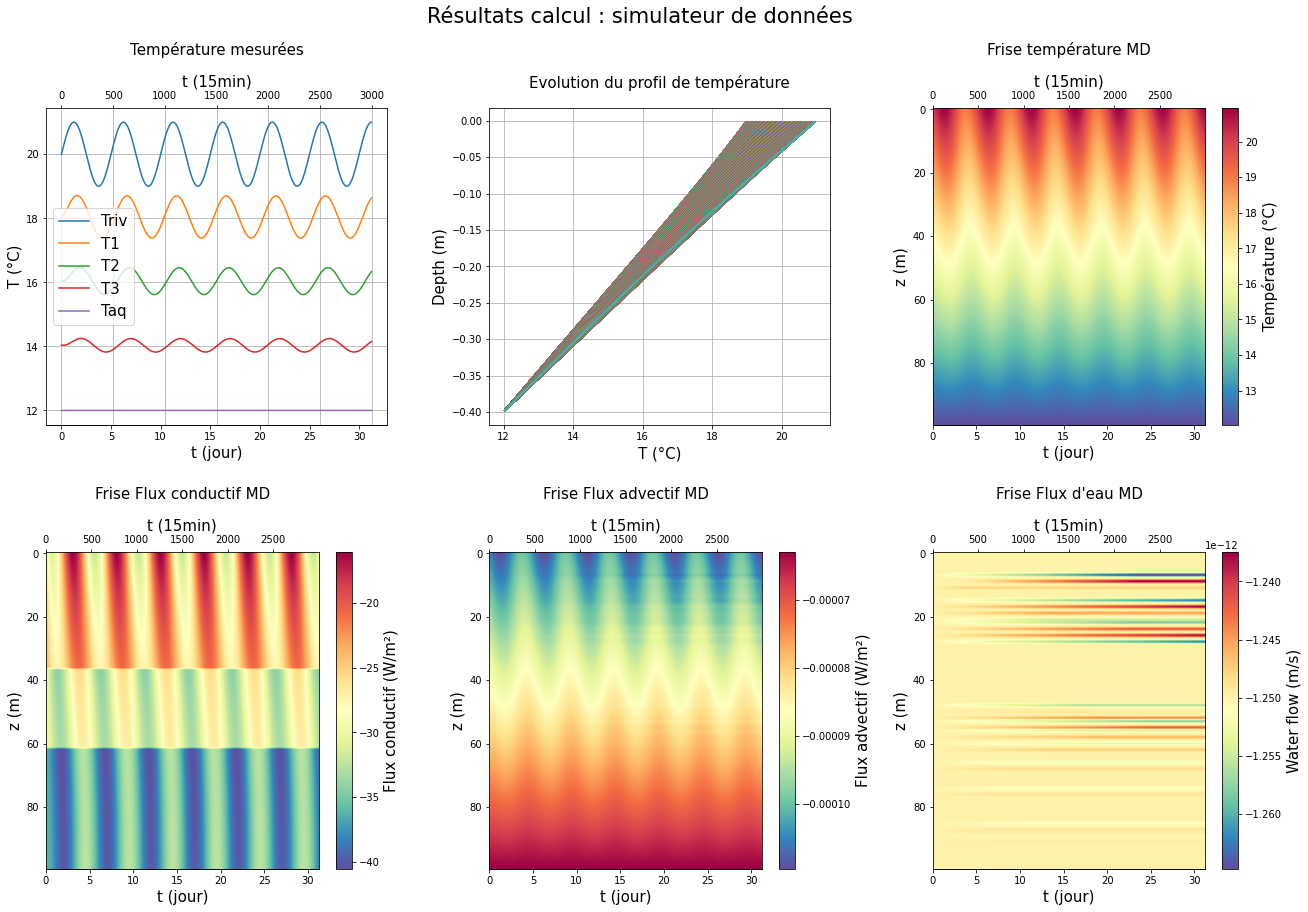

In [12]:
# paramètres principaux de l'expérience
dict_exp_multilayer ={
    "depth_sensors": [.1, .2, .3, .4],
    "dH_offset": -0.5,
    "name_list": ["gravier","sable","argile"],
    "zLow_list": [.15,.25,.4],
    "moinslog10K_list": [12,12,12],
    "n_list": [.5,.3,.1],
    "lambda_s_list": [2,2,2],
    "rho_cs_list": [4e6,4e6,4e6],
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_multilayer = [*gen_experiment_multilayer(**dict_exp_multilayer)] # [time_series, colonne_exp, layerlist]
time_ser = experiment_multilayer[0]
col = experiment_multilayer[1]
layerlist = experiment_multilayer[2]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)

## 3.2 une couche sans capteur

### 3.2.1 Infiltrant

--- Compute Solve Transi ---
gravier : ends at 0.21 m. Parametres(moinslog10K=12, n=0.5, lambda_s=2, rhos_cs=4000000.0)
sable : ends at 0.27 m. Parametres(moinslog10K=12, n=0.3, lambda_s=2, rhos_cs=4000000.0)
argile : ends at 0.4 m. Parametres(moinslog10K=12, n=0.1, lambda_s=2, rhos_cs=4000000.0)
Done.


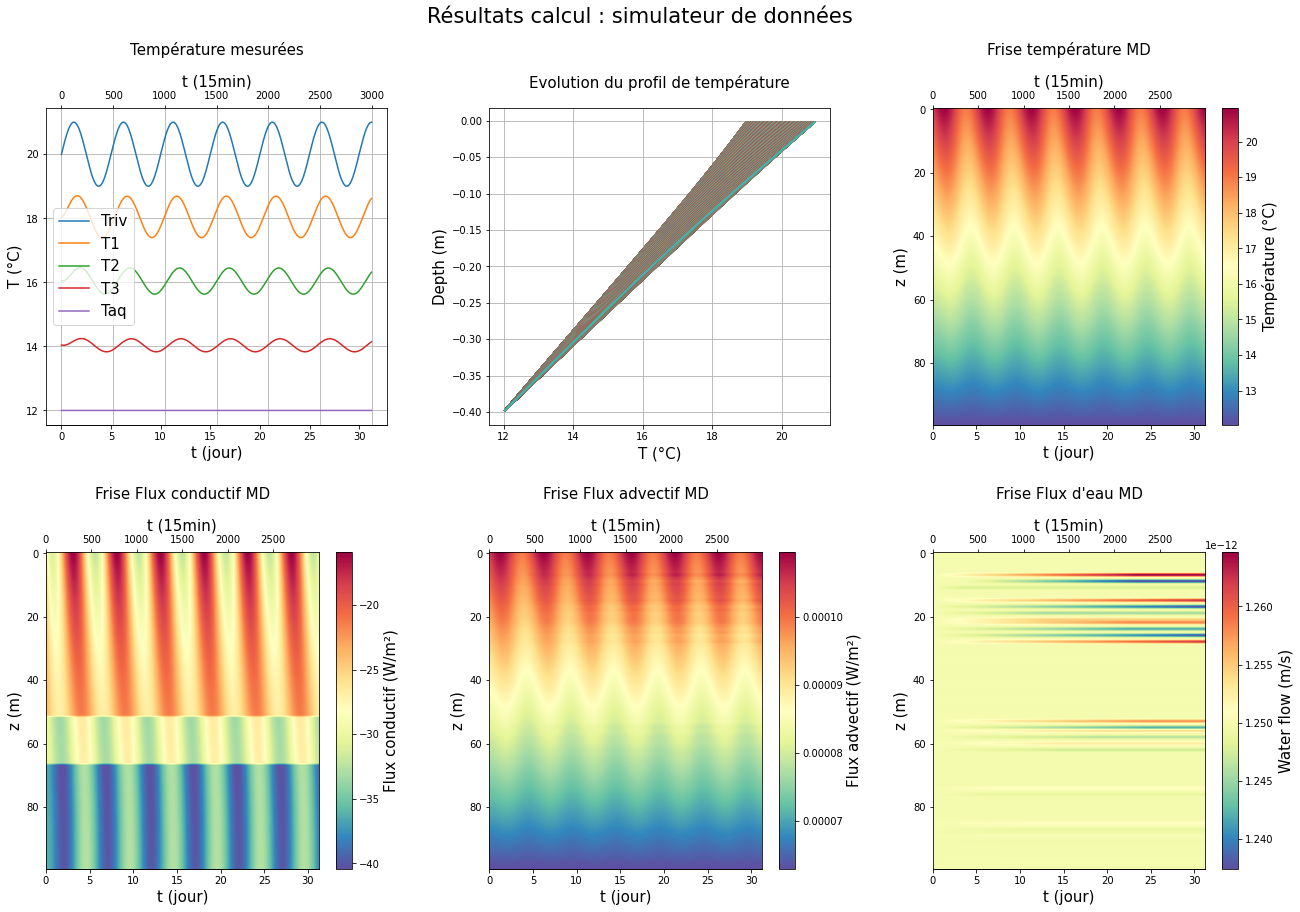

In [13]:
# paramètres principaux de l'expérience
dict_exp_multilayer ={
    "depth_sensors": [.1, .2, .3, .4],
    "dH_offset": 0.5,
    "name_list": ["gravier","sable","argile"],
    "zLow_list": [.21,.27,.4],
    "moinslog10K_list": [12,12,12],
    "n_list": [.5,.3,.1],
    "lambda_s_list": [2,2,2],
    "rho_cs_list": [4e6,4e6,4e6],
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_multilayer = [*gen_experiment_multilayer(**dict_exp_multilayer)] # [time_series, colonne_exp, layerlist]
time_ser = experiment_multilayer[0]
col = experiment_multilayer[1]
layerlist = experiment_multilayer[2]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)

### 3.2.2 Exfiltrant

--- Compute Solve Transi ---
gravier : ends at 0.21 m. Parametres(moinslog10K=12, n=0.5, lambda_s=2, rhos_cs=4000000.0)
sable : ends at 0.27 m. Parametres(moinslog10K=12, n=0.3, lambda_s=2, rhos_cs=4000000.0)
argile : ends at 0.4 m. Parametres(moinslog10K=12, n=0.1, lambda_s=2, rhos_cs=4000000.0)
Done.


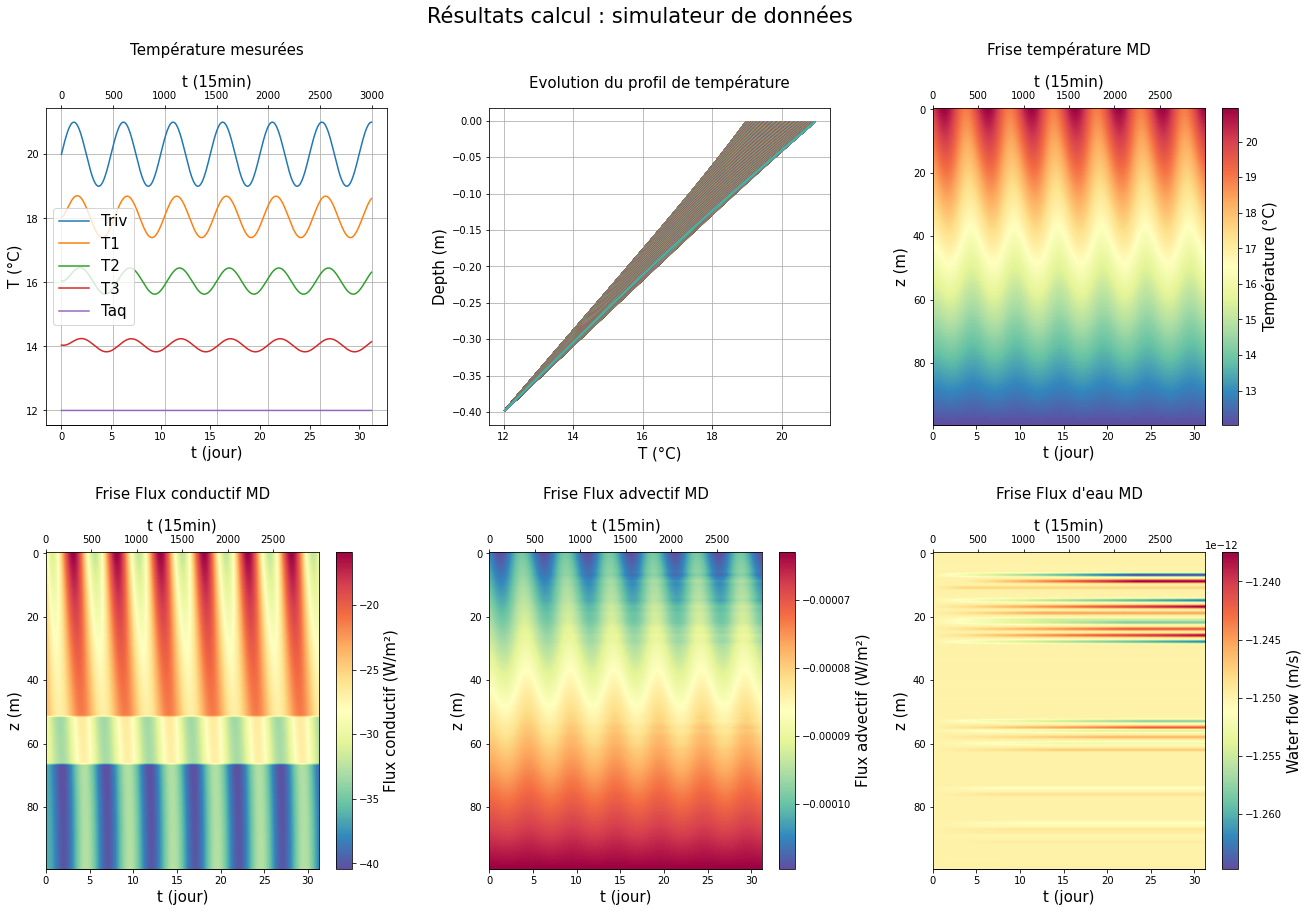

In [14]:
# paramètres principaux de l'expérience
dict_exp_multilayer ={
    "depth_sensors": [.1, .2, .3, .4],
    "dH_offset": -0.5,
    "name_list": ["gravier","sable","argile"],
    "zLow_list": [.21,.27,.4],
    "moinslog10K_list": [12,12,12],
    "n_list": [.5,.3,.1],
    "lambda_s_list": [2,2,2],
    "rho_cs_list": [4e6,4e6,4e6],
    "nb_cells": nb_cells,
}
# maj variables globales

experiment_multilayer = [*gen_experiment_multilayer(**dict_exp_multilayer)] # [time_series, colonne_exp, layerlist]
time_ser = experiment_multilayer[0]
col = experiment_multilayer[1]
layerlist = experiment_multilayer[2]
time_ser._measures_column_one_layer(col, layerlist, nb_cells)
col.plot_CALC_results(nt = 3000)